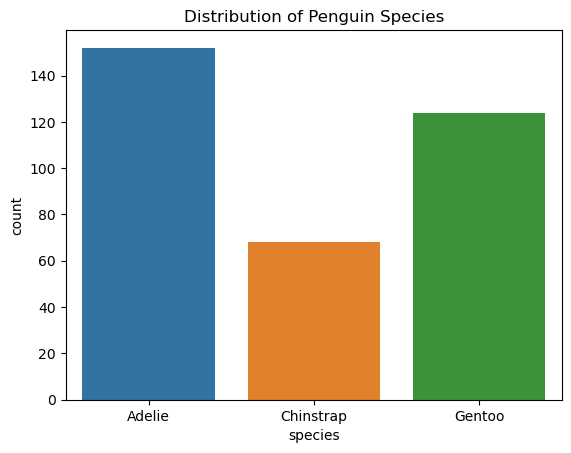

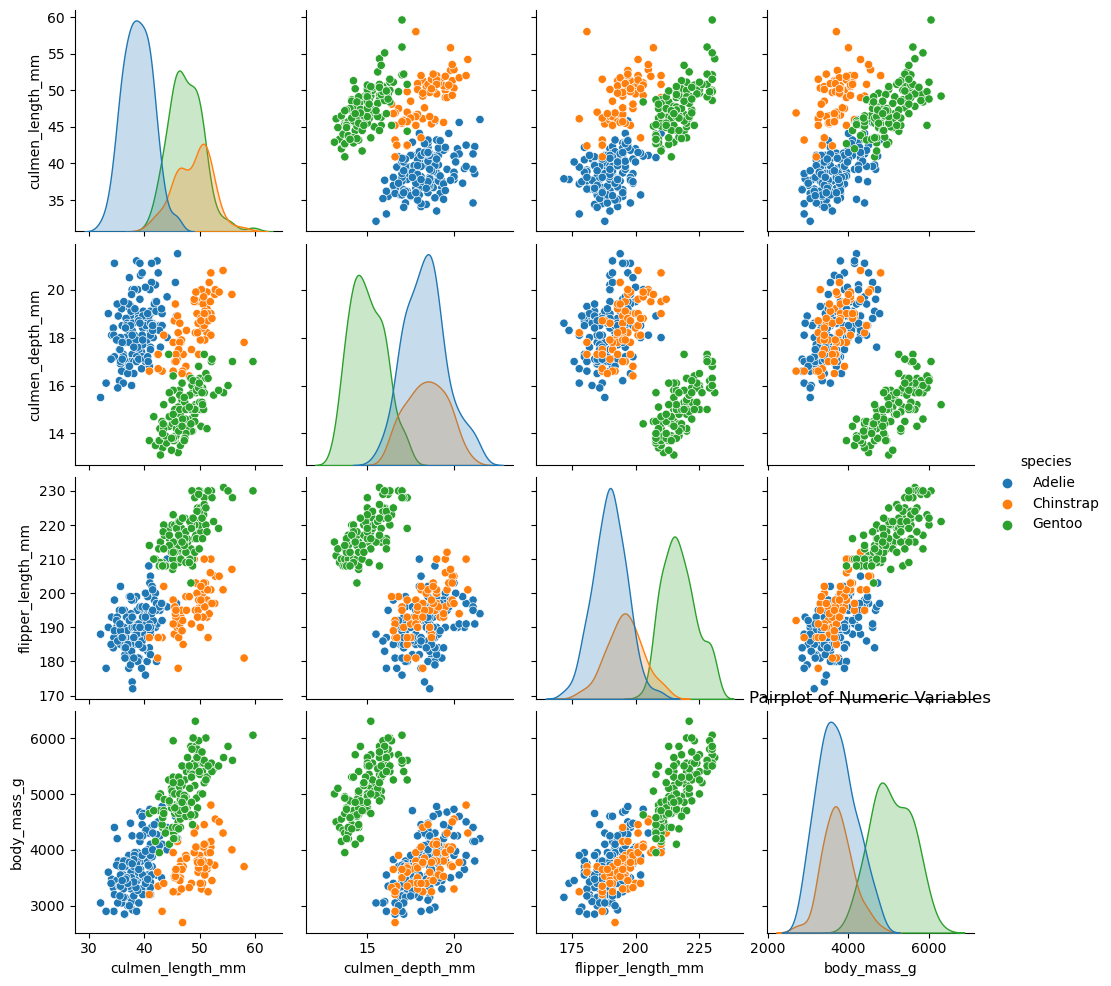

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000
Missing Values:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
Correlation with Target:
body_mass_g          1.000000
flipper_length_mm    0.871221
culmen_length_mm     0.594925
culmen_depth_mm     -0.471942
N

C:\Users\Sumit\AppData\Local\Temp\ipykernel_27196\1623971620.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][outliers] = np.nan
C:\Users\Sumit\AppData\Local\Temp\ipykernel_27196\1623971620.py:52: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)
C:\Users\Sumit\AppData\Local\Temp\ipykernel_27196\1623971620.py:56: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warnin

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Download the dataset: Dataset

# 2. Load the dataset into the tool
df = pd.read_csv('C:/Users/Sumit/AI ML SmartBridge/Assignment-3/penguins_size.csv')

# 3. Perform Below Visualizations

# Visualize the distribution of the target variable (Species)
sns.countplot(data=df, x='species')
plt.title('Distribution of Penguin Species')
plt.show()

# Pairplot for numeric variables
sns.pairplot(df, hue='species')
plt.title('Pairplot of Numeric Variables')
plt.show()

# 4. Perform descriptive statistics on the dataset
descriptive_stats = df.describe()
print(descriptive_stats)

# 5. Check for Missing values and deal with them
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# 6. Find the outliers and replace them

# Select only numeric columns for outlier detection
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Define a function to find and replace outliers using Z-scores
def replace_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = z_scores > threshold
    data[column][outliers] = np.nan

# Iterate through numeric columns and replace outliers using Z-scores
for col in numeric_cols:
    replace_outliers_zscore(df, col)

# Replace NaN values with the median of each column
df.fillna(df.median(), inplace=True)

# Now, df contains the dataset with outliers replaced using Z-scores
# 7. Check the correlation of independent variables with the target
correlation_matrix = df.corr()
target_correlation = correlation_matrix['body_mass_g'].sort_values(ascending=False)
print("Correlation with Target:")
print(target_correlation)

# 8. Check for Categorical columns and perform encoding
# The 'Sex' and 'Island' columns are categorical. You can encode them using one-hot encoding.
df_encoded = pd.get_dummies(df, columns=['sex', 'island'], drop_first=True)

# 9. Split the data into dependent and independent variables
X = df_encoded.drop('species', axis=1)
y = df_encoded['species']

# 10. Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11. Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 12. Check the training and testing data shape
print("Training Data Shape:")
print(X_train.shape, y_train.shape)
print("Testing Data Shape:")
print(X_test.shape, y_test.shape)